In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import sys

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.handlelength'] = 2
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)
from nbodykit.lab import *

Nmodel="Tree"
size=128
log=True

ignore_0=True

def transform(x,y,z,nx,ny,nz):
    return x + y*nx + z*nx*ny

In [2]:
filename='data_HMass-DenDM_s'+str(size)+'_V.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DMD'].shape)
print(f['HM'].shape)
DMD=f['DMD']
DMD=np.array(DMD)
HM=f['HM']
HM=np.array(HM)
f.close()

['DMD', 'HM']
(128, 128, 128)
(128, 128, 128)


In [3]:
train=0.5
test=1-train
long=len(HM[0])
lim=int(long*train)

if log==True and (max(HM.ravel())>1000):
    HM=np.log10(HM)
    DMD=np.log10(DMD)

HM_train=[]
HM_test=[]
DMD_train=[]
DMD_test=[]
HM_slice=[]
DMD_slice=[]
R_train=[]
R_test=[]
# h=0

for i in range(0,long):
    for j in range(0,long):
        for k in range(0,long):
            if k<lim:
                HM_train.append(HM[i][j][k])
                DMD_train.append(DMD[i][j][k])
                R_train.append((i,j,k))
            else:    
                HM_test.append(HM[i][j][k])
                DMD_test.append(DMD[i][j][k]) 
                R_test.append((i,j,k))
                
            if k> 100 and k< 102:
                HM_slice.append(HM[i][j][k])
                DMD_slice.append(DMD[i][j][k])
                             
                    
HM_train=np.array(HM_train)
DMD_train=np.array(DMD_train)
HM_test=np.array(HM_test)
DMD_test=np.array(DMD_test)
HM_slice=np.array(HM_slice)
DMD_slice=np.array(DMD_slice)
R_train=np.array(R_train).astype(int)
R_test=np.array(R_test).astype(int)

# print("h="+str(h))
print(HM_train.shape)
print(DMD_train.shape)
print(HM_test.shape)
print(DMD_test.shape)

(1048576,)
(1048576,)
(1048576,)
(1048576,)


In [4]:
print(HM[127][99][100])
print(DMD[127][99][100])


11.0755163701045
0.61023366


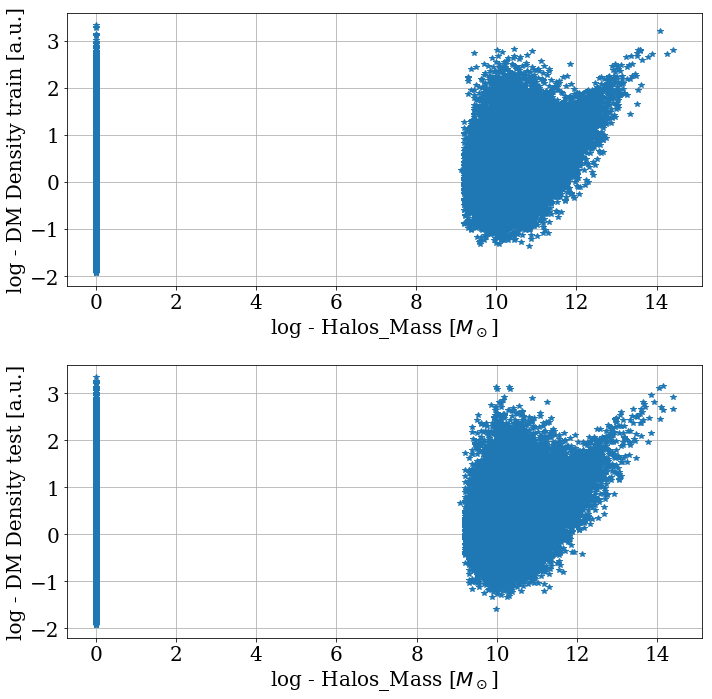

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(HM_train.ravel(),DMD_train.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density train [a.u.]",size=20)
plt.grid()
# plt.savefig('./Figures_data_HMass-DenDM/Tree/'+Nmodel+'_logDMD_logHM_train_s'+str(size), bbox_inches = 'tight')
plt.subplot(212)
plt.plot(HM_test.ravel(),DMD_test.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density test [a.u.]",size=20)
plt.grid()
plt.tight_layout()
# plt.savefig('./Figures_data_HMass-DenDM/Tree/'+Nmodel+'_logDMD_logHM_test_s'+str(size), bbox_inches = 'tight')
plt.show()

In [6]:
Delta=0.1
#Delta=int ((max(HM_train)-min(HM_train))/div)
print("Delta: "+str(Delta))
print("Max: "+str((max(HM_train))))
print("Min: "+str((min(HM_train))))

columns=int((max(HM_train)-min(HM_train))/Delta)+2
print("Columns: "+str(columns))

indext=[]
col=[]
for k in range(columns):
    indext.append([])

if ignore_0==True:
    init=1
else:
    init=0
    
for i in range(0,len(HM_train)):    
    for j in range(init,columns):
        if HM_train[i]>Delta*(j-1) and  HM_train[i]<=Delta*j:
            indext[j].append(i)
#     print(len(indext[j]))
#     print("j: "+str(j))
    i=0
    col.append((Delta*(j-1),Delta*j))
indext=np.array(indext)
# print(indext.shape)
suma=0
print("")
for k in range(columns):
#     print(len(indext[k]))
    suma=suma+len(indext[k])
print(suma)    
print(len(HM_train))
# print(len(indext[0]))3
print("")
# print(col)

Delta: 0.1
Max: 14.416445541358502
Min: 0.0
Columns: 146

39525
1048576



In [7]:
dx=int(long)
dy=int(long)
dz=int(long*test)

DMD_rand=np.zeros(dx*dy*dz)+100000
DMD_rand=DMD_rand.reshape(dx,dy,dz)
# DMD_rand=[]
DMD_min=min(DMD.ravel())

for j in range(0,columns):
    for i in range(0,len(HM_train)):
        if (HM_test[i]>Delta*(j-1) and HM_test[i]<=Delta*j):
            rx=R_train[i][0]
            ry=R_train[i][1]
            rz=R_train[i][2]

            if len(indext[j]) == 0:
                DMD_rand[rx][ry][rz]=DMD_min
            else:
                ix=random.choice(indext[j])
                DMD_rand[rx][ry][rz]=DMD_train[ix]
            #             print(rx,ry,rz)
    #       DMD_rand.append(DMD_train[ix])
#             DMD_rand[transform(rx,ry,rz,dx,dy,dz)]=DMD_train[ix]
#             DMD_rand.append(DMD_train[ix])
            
            continue
#     print(j)

# DMD_rand=np.array(DMD_rand)    
# DMD_rand=DMD_rand.reshape(dx,dy,d/z)
# print(DMD_rand.shape)
DMD_rand=np.array(DMD_rand)

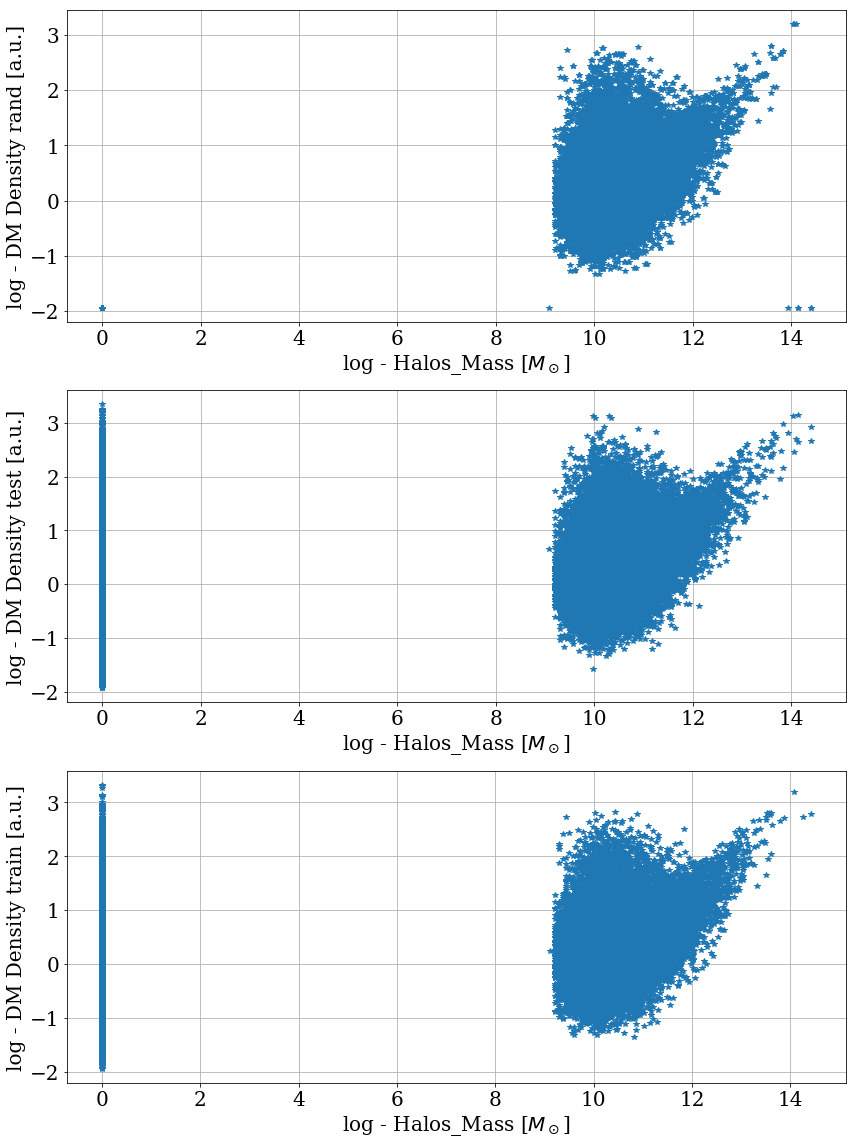

In [8]:
fig = plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(HM_test.ravel(),DMD_rand.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density rand [a.u.]",size=20)
plt.grid()
# plt.savefig('./Figures_data_HMass-DenDM/Tree/'+Nmodel+'_logDMD_logHM_train_s'+str(size), bbox_inches = 'tight')
plt.subplot(312)
plt.plot(HM_test.ravel(),DMD_test.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density test [a.u.]",size=20)
plt.grid()
plt.tight_layout()
# plt.savefig('./Figures_data_HMass-DenDM/Tree/'+Nmodel+'_logDMD_logHM_test_s'+str(size), bbox_inches = 'tight')
plt.subplot(313)
plt.plot(HM_train.ravel(),DMD_train.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density train [a.u.]",size=20)
plt.grid()
plt.tight_layout()
# plt.savefig('./Figures_data_HMass-DenDM/Tree/'+Nmodel+'_logDMD_logHM_test_s'+str(size), bbox_inches = 'tight')
plt.show()

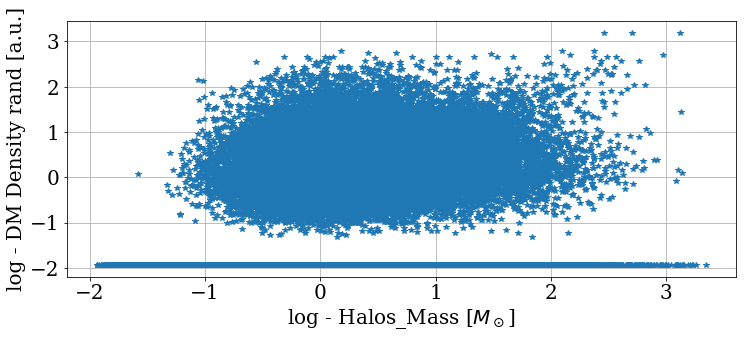

In [9]:
fig = plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(DMD_test.ravel(),DMD_rand.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density rand [a.u.]",size=20)
plt.grid()

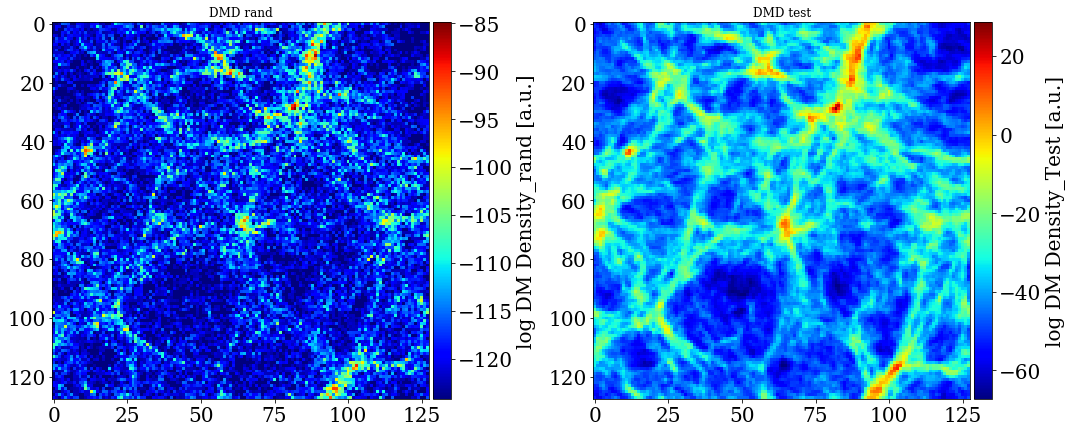

In [10]:
HM_trainp=HM_train.reshape(long,long,round(long*train))
HM_testp=HM_test.reshape(long,long,round(long*train))
DMD_trainp=DMD_train.reshape(long,long,round(long*train))
DMD_testp=DMD_test.reshape(long,long,round(long*test))

fig = plt.figure(figsize=(15, 7))
plt.jet()
plt.subplot(121)
plt.title("DMD rand")
mesh_rand = ArrayMesh(DMD_rand, BoxSize=1.0)
plt.imshow(mesh_rand.preview(axes=[0,1]))
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_rand [a.u.]', size=20)
plt.subplot(122)
plt.title("DMD test")
mesh_test = ArrayMesh(DMD_testp, BoxSize=1.0)
plt.imshow(mesh_test.preview(axes=[0,1]))
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_Test [a.u.]', size=20)
plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/logDMD_logHM_random_s'+str(size)+"Zero_"+str(ignore_0), bbox_inches = 'tight')
plt.show()

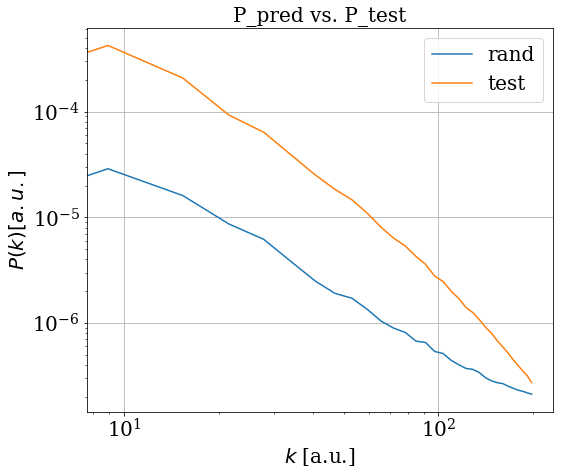

In [15]:
r_pred = FFTPower(mesh_rand, mode='1d')# the result is stored at "power" attribute
Pk_pred = r_pred.power
r_test = FFTPower(mesh_test, mode='1d')# the result is stored at "power" attribute
Pk_test = r_test.power

fig=plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("P_pred vs. P_test",size=20)
plt.loglog(Pk_pred['k'], Pk_pred['power'].real - Pk_pred.attrs['shotnoise'] , label="rand")
plt.loglog(Pk_test['k'], Pk_test['power'].real - Pk_test.attrs['shotnoise'], label="test")
plt.grid()
plt.legend()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k) [a.u.]$",size=20)
plt.tight_layout()

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_pred_1d_random_s'+str(size), bbox_inches='tight')